In [11]:
import sys,os
sys.path.append('/home/monte.flora/python_packages/scikit-explain/')
sys.path.append('/home/monte.flora/python_packages/master/ml_workflow')
sys.path.append('/work/mflora/ROAD_SURFACE')
import skexplain
from os.path import join
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import joblib
import matplotlib.pyplot as plt
from display_names import to_readable_names, get_units, to_color

from probsr_config import PREDICTOR_COLUMNS, FIGURE_MAPPINGS, COLOR_DICT
from skexplain.common.importance_utils import to_skexplain_importance
import itertools

In [12]:
BASE_PATH = '/work/mflora/explainability_work/'
DATA_BASE_PATH = os.path.join(BASE_PATH, 'datasets')
MODEL_BASE_PATH = os.path.join(BASE_PATH, 'models')
RESULTS_PATH = os.path.join(BASE_PATH, 'results')

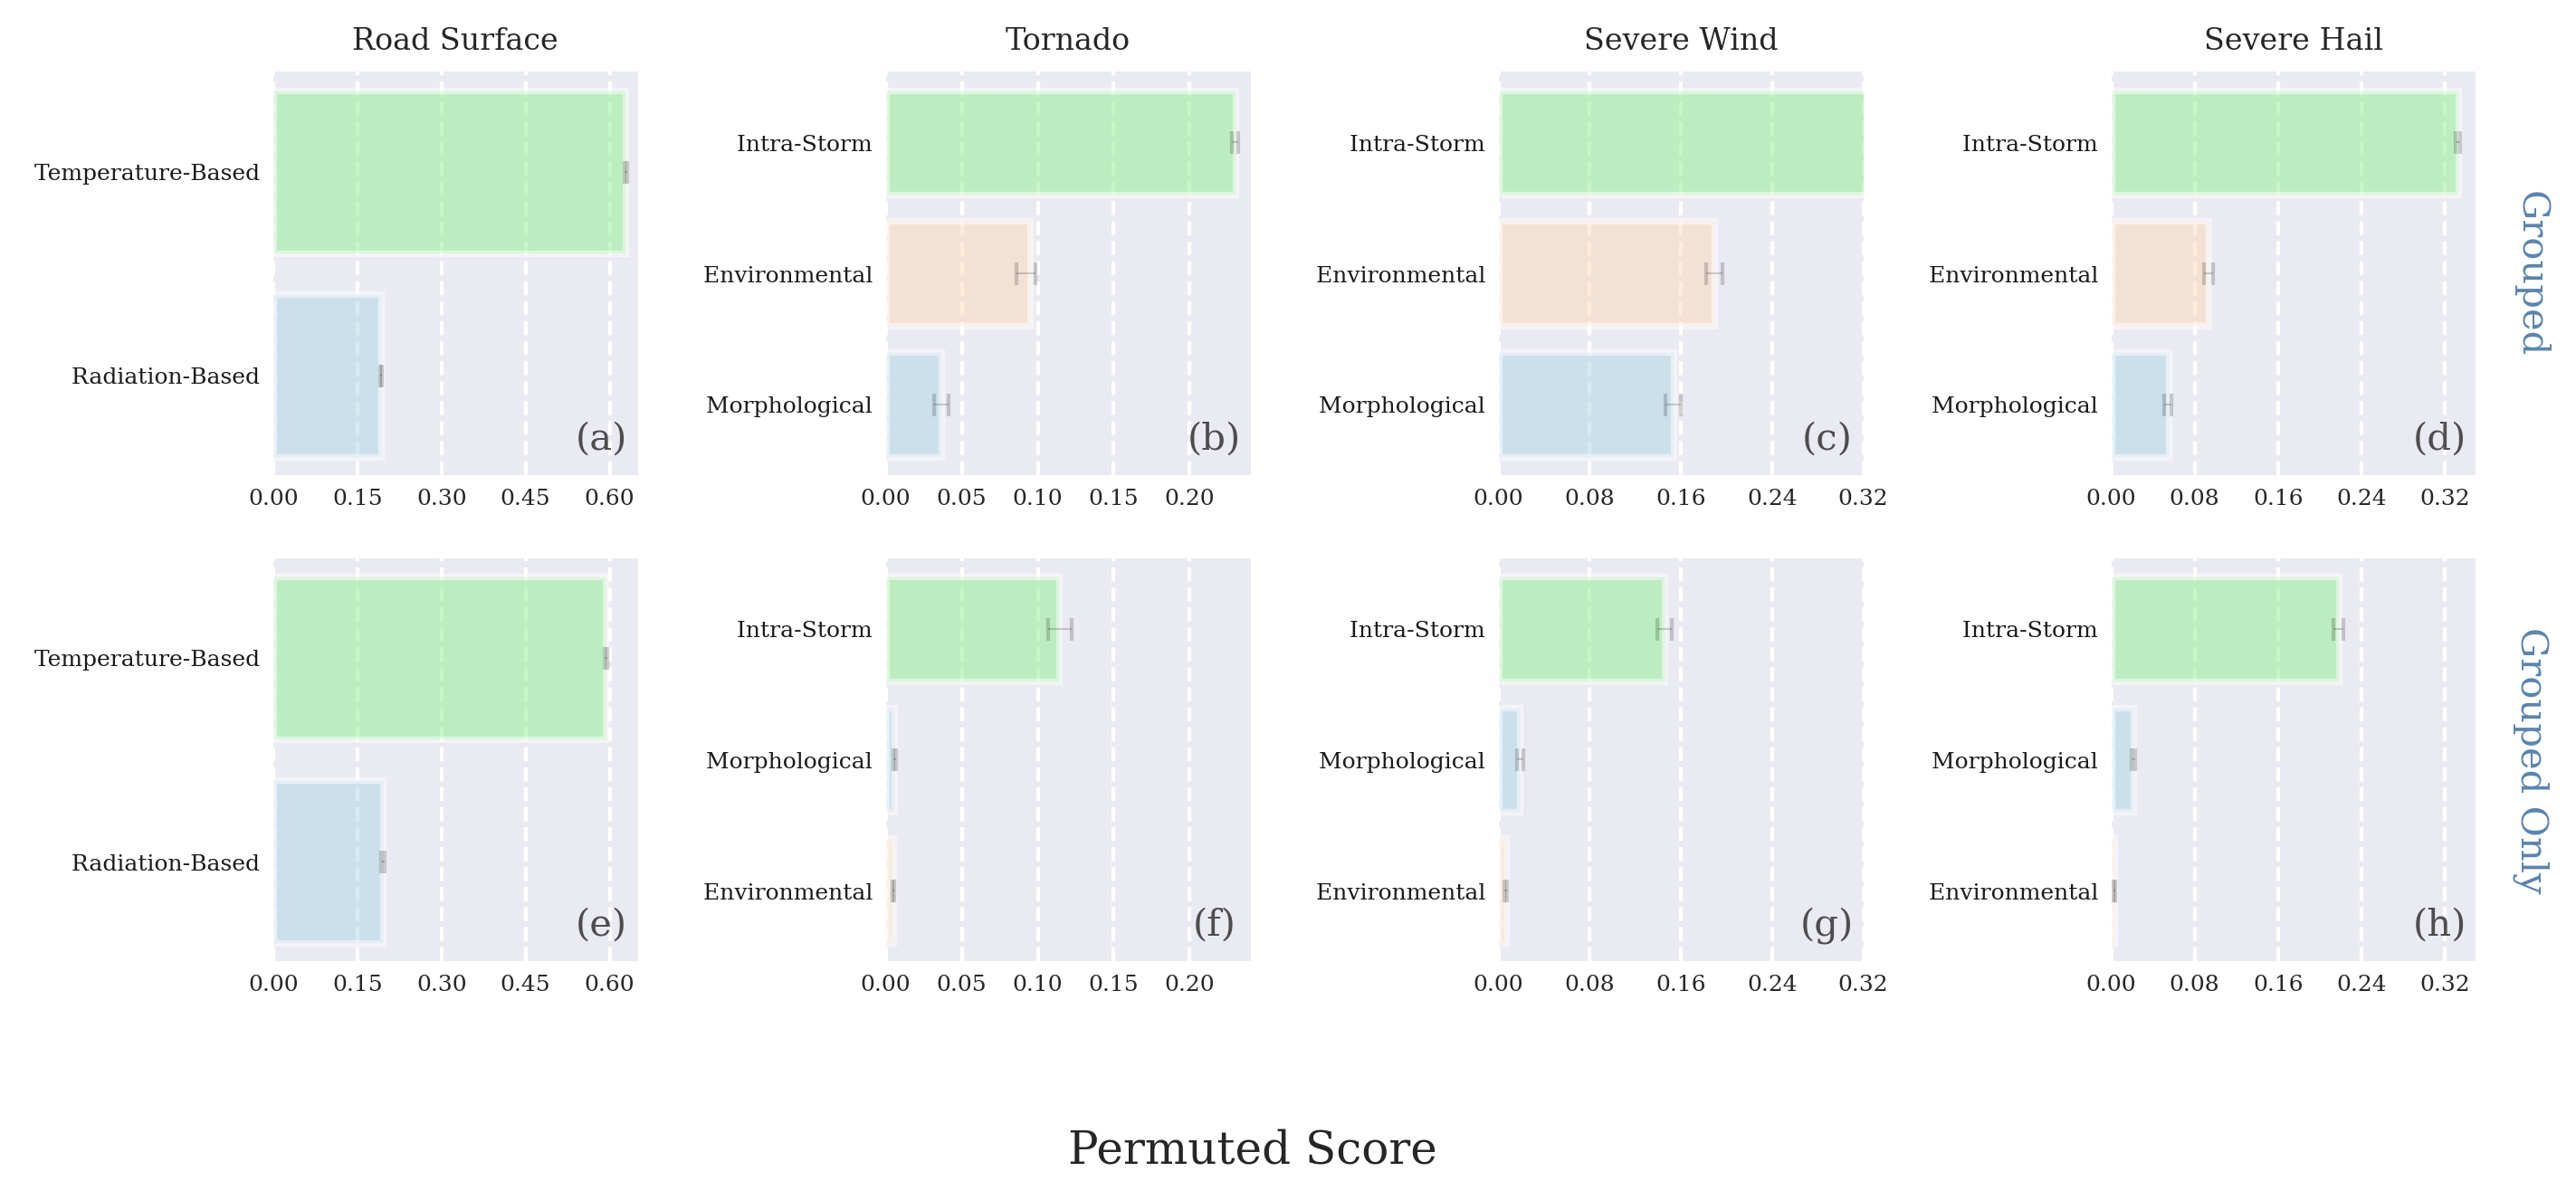

In [28]:
sns.set_theme()

targets = ['road_surface', 'tornado', 'severe_wind', 'severe_hail']
methods = ['grouped', 'grouped_only']


feature_colors = {'Intra-Storm' : 'lightgreen',
                  'Environmental' : 'peachpuff', 
                  'Morphological' : 'lightblue',
                  'Temperature-Based' : 'lightgreen',
                  'Radiation-Based' : 'lightblue',
                 }

explainer = skexplain.ExplainToolkit(seaborn_kws={'style':'dark', })
data = []
for perm_method,target in itertools.product(methods, targets):
    data.append( explainer.load(join(DATA_BASE_PATH, f'{perm_method}_importance_{target}.nc')))

    
panels = [('grouped', 'LR'), ('grouped', 'LR'),('grouped', 'LR'),('grouped', 'LR'),
          ('grouped_only', 'LR'), ('grouped_only', 'LR'),('grouped_only', 'LR'),('grouped_only', 'LR'), 
         ]   
    
f, axes = explainer.plot_importance(data=data, 
                                    panels = panels, 
                                    feature_colors = feature_colors, 
                                   n_columns=4, 
                                   ylabels = ['Grouped', 'Grouped Only'],
                                   xlabels=['']*8,
                                    hspace=0.2,
                                    figsize = (10,4)
                                   )

axes[1,1].annotate('Permuted Score', (0.5, -0.5), xycoords='axes fraction')

for i, ax in enumerate(axes.flat):
    if i ==0 or i==4:
        ax.set_xlim([0, 0.65])
    elif i == 1 or i==5:
        ax.set_xlim([0, 0.24])
    elif i == 2 or i==6:
        ax.set_xlim([0, 0.32])
    
    else:
        ax.set_xlim([0, 0.35])
    ax.xaxis.grid(ls='dashed')


titles = ['Road Surface', 'Tornado', 'Severe Wind', 'Severe Hail']

for ax, title in zip(axes.flat, titles):
        ax.set_title(title)